<a href="https://colab.research.google.com/github/raut-rahul-2137/Basic_classify_images_of_clothing./blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
#Downloading the IMDB dataset
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1",url,
                                  untar=True,cache_dir ='.',
                                  cache_subdir='')


84125825/84125825 [==============================] - 4s 0us/step


In [ ]:
dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

In [ ]:
os.listdir(dataset_dir)

['test', 'imdbEr.txt', 'README', 'train', 'imdb.vocab']

In [ ]:
train_dir = os.path.join(dataset_dir,'train')
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'urls_pos.txt',
 'unsupBow.feat',
 'unsup',
 'urls_unsup.txt',
 'urls_neg.txt']

In [ ]:
test_dir = os.path.join(dataset_dir,'test')
os.listdir(test_dir)

['labeledBow.feat', 'neg', 'pos', 'urls_pos.txt', 'urls_neg.txt']

In [ ]:
#the aclImdb/train/pos and aclImdv/train/neg directories contain many text files,each of which is a single movie review.

sample_file = os.path.join(train_dir,'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())




Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [ ]:
remove_dir =os.path.join(train_dir,'unsup')
shutil.rmtree(remove_dir)

In [ ]:
batch_size =32
seed = 42
raw_train_ds =tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [ ]:
for text_batch , label_batch in raw_train_ds.take(1):
  for i  in range(3):
    print("Reiew",text_batch.numpy()[i])
    print("label",label_batch.numpy()[i])


Reiew b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
label 0
Reiew b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into co

In [ ]:
print("Label 0 corresponds to ",raw_train_ds.class_names[0])
print("Label 1 corresponds to ",raw_train_ds.class_names[1])

Label 0 corresponds to  neg
Label 1 corresponds to  pos


In [ ]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size = batch_size,
    validation_split =0.2,
    subset='validation',
    seed =seed
)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size = batch_size
)

Found 25000 files belonging to 2 classes.


In [ ]:
#prepare the dataset for traing

In [ ]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html=tf.strings.regex_replace(lowercase,'<br/>',' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]'% re.escape(string.punctuation),'')

In [ ]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize = custom_standardization,
    max_tokens = max_features,
    output_mode ='int',
    output_sequence_length =sequence_length
)

In [ ]:
#make a text only dataset (without labels),then call adapt
train_text =raw_train_ds.map(lambda x,y:x)
vectorize_layer.adapt(train_text)

In [ ]:
#lets creat a function to see the result of using this layer to preprocess some data
def vectorize_text(text,label):
  text = tf.expand_dims(text,-1)
  return vectorize_layer(text),label


In [ ]:
#retrieve a batch ( of 32 reviews  and labes )from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review,first_label = text_batch[0],label_batch[0]
print("review ",first_review)
print("label",raw_train_ds.class_names[first_label])
print("Vectorize review", vectorize_text(first_review,first_label))


review  tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
label neg
Vectorize review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  87,   18,  259,    2,  223,    1,  566,   31,  228,   11, 2422,
           1,   52,   23,   26,  400,  250,   12,  308,  280,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

In [ ]:
print("1287===>",vectorize_layer.get_vocabulary()[1287])
print("  313->>>",vectorize_layer.get_vocabulary()[313])
print("vocabulary size : {}".format(len(vectorize_layer.get_vocabulary())))

1287===> naked
  313->>> night
vocabulary size : 10000


In [ ]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size =  AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
#Creat the model
#its time to create your neural network


embedding_dim = 16


In [ ]:
model = tf.keras.Sequential([
    layers.Embedding(max_features,embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(1)

])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160017 (625.07 KB)
Trainable params: 160017 (625.07 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
#Now configure the model to use an optimizer and a loss function

model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics = tf.metrics.BinaryAccuracy(threshold =0.0)
              )

In [ ]:
#train th model

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
625/625 [==============================] - 8s 11ms/step - loss: 0.6639 - binary_accuracy: 0.6967 - val_loss: 0.6146 - val_binary_accuracy: 0.7680
Epoch 2/10
625/625 [==============================] - 5s 9ms/step - loss: 0.5487 - binary_accuracy: 0.7990 - val_loss: 0.4990 - val_binary_accuracy: 0.8204
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.4464 - binary_accuracy: 0.8447 - val_loss: 0.4219 - val_binary_accuracy: 0.8472
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3805 - binary_accuracy: 0.8661 - val_loss: 0.3762 - val_binary_accuracy: 0.8592
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3380 - binary_accuracy: 0.8771 - val_loss: 0.3477 - val_binary_accuracy: 0.8656
Epoch 6/10
625/625 [==============================] - 6s 9ms/step - loss: 0.3068 - binary_accuracy: 0.8878 - val_loss: 0.3284 - val_binary_accuracy: 0.8700
Epoch 7/10
625/625 [==============================] - 4s 7ms/st

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Loss: ",loss)
print("Accuracy: ",accuracy)

782/782 [==============================] - 5s 6ms/step - loss: 0.3132 - binary_accuracy: 0.8716
Loss:  0.31321981549263
Accuracy:  0.8716400265693665


In [ ]:
#creating plot of accuracy and loss over time
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

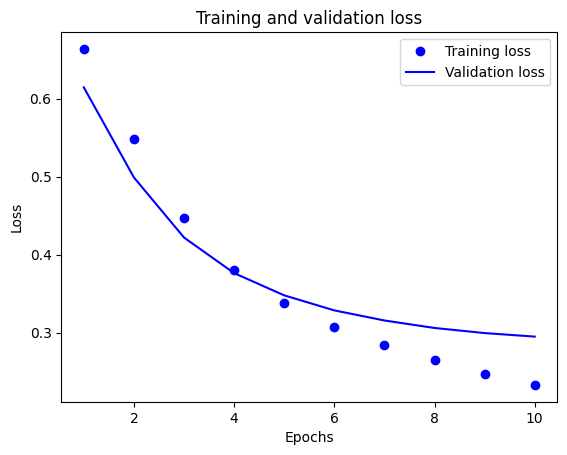

In [ ]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

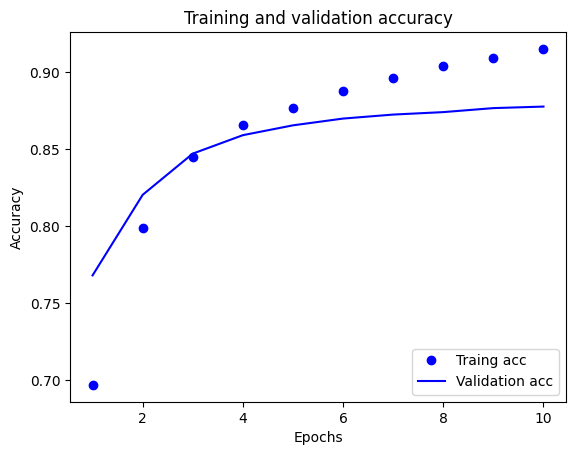

In [ ]:
plt.plot(epochs ,acc , 'bo' , label = "Traing acc")
plt.plot(epochs, val_acc, 'b',label ='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc ='lower right')
plt.show()

In [ ]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 6s 7ms/step - loss: 0.3132 - accuracy: 0.8716
0.8716400265693665


In [ ]:
#to get prediction for new examples
examples = [

            "The movie was bad!",
            "The movie wa okay.",
            "The movie was good...."


]


export_model.predict(examples)

1/1 [==============================] - 0s 142ms/step


array([[0.36643374],
       [0.45901865],
       [0.53165317]], dtype=float32)